### Develop LSTM Models For Univariate Time Series Forecasting


In [94]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [95]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_steps):
    X, y = [], []
    for i in range(len(timeseries_data)):
        end_ix = i + n_steps
        if end_ix > len(timeseries_data) - 1:
            break
        seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [96]:
timeseries_data = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115]
n_steps = 4
X, y = prepare_data(timeseries_data, n_steps)

In [107]:
X, y

(array([[[112],
         [118],
         [132],
         [129]],
 
        [[118],
         [132],
         [129],
         [121]],
 
        [[132],
         [129],
         [121],
         [135]],
 
        [[129],
         [121],
         [135],
         [148]],
 
        [[121],
         [135],
         [148],
         [148]],
 
        [[135],
         [148],
         [148],
         [136]],
 
        [[148],
         [148],
         [136],
         [119]],
 
        [[148],
         [136],
         [119],
         [104]],
 
        [[136],
         [119],
         [104],
         [118]]]),
 array([121, 135, 148, 148, 136, 119, 104, 118, 115]))

In [108]:
X.shape,y.shape

((9, 4, 1), (9,))

In [111]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

((9, 4, 1), (9,))

### Building LSTM Model


In [100]:
model = Sequential()
model.add(
    LSTM(
        50, activation="relu", return_sequences=True, input_shape=(n_steps, n_features)
    )
)
model.add(LSTM(50, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 3s 3s/step - loss: 15338.0664
Epoch 2/300
1/1 [==============================] - 0s 7ms/step - loss: 14250.8428
Epoch 3/300
1/1 [==============================] - 0s 5ms/step - loss: 13024.6631
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 11811.1416
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 10293.9834
Epoch 6/300
1/1 [==============================] - 0s 6ms/step - loss: 8757.1885
Epoch 7/300
1/1 [==============================] - 0s 6ms/step - loss: 7562.3115
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 6606.5801
Epoch 9/300
1/1 [==============================] - 0s 5ms/step - loss: 5725.6108
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 4854.7075
Epoch 11/300
1/1 [==============================] - 0s 5ms/step - loss: 3975.7847
Epoch 12/300
1/1 [==============================] - 0s 6ms/step - loss: 3129.7554
Epoch 13/300
1/1 [===

### Predicting For the next 10 data

In [101]:
x_input = np.array(timeseries_data[len(timeseries_data) - n_steps :])
temp_input = list(x_input)
lst_output = []
i = 0
while i < 10:
    if len(temp_input) > 4:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        temp_input = temp_input[1:]
        lst_output.append(yhat[0][0])
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i = i + 1


print(lst_output)

[122.79885, 121.92625, 126.43403, 128.54364, 132.55647, 133.41785, 137.16061, 140.34813, 142.32947, 143.71385]


### Visualizaing The Output


In [102]:
import matplotlib.pyplot as plt

In [116]:
day_new = np.arange(1, 14)
day_pred = np.arange(14, 24)

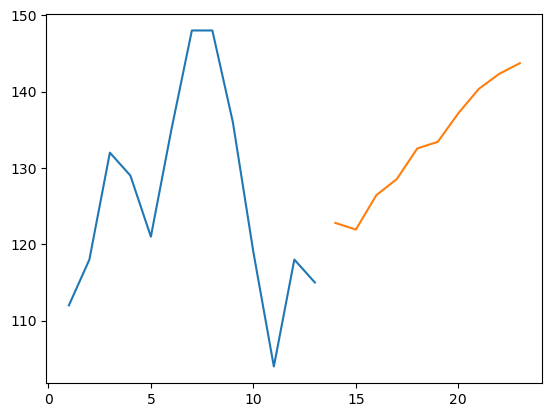

In [117]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)

### Python Code